# Dev notebook - AS


## Load and process

In [1]:
%matplotlib widget
import time
import numpy as np
from aeromaps.core.process import create_process
from aeromaps.core.models import models_complex
from aeromaps.models.air_transport.aircraft_fleet_and_operations.fleet.fleet_model import (
    Fleet,
    AircraftParameters,
    Aircraft,
)

In [2]:
process = create_process(
    models=models_complex,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

## Set up variables

### Aviation scenario

In [3]:
# Air traffic evolution

## Growth rate by category [%]
process.parameters.cagr_passenger_short_range_reference_periods = []
process.parameters.cagr_passenger_short_range_reference_periods_values = [4.0]
process.parameters.cagr_passenger_medium_range_reference_periods = []
process.parameters.cagr_passenger_medium_range_reference_periods_values = [4.0]
process.parameters.cagr_passenger_long_range_reference_periods = []
process.parameters.cagr_passenger_long_range_reference_periods_values = [4.0]
process.parameters.cagr_freight_reference_periods = []
process.parameters.cagr_freight_reference_periods_values = [4.0]

In [4]:
# Aircraft fleet

## Initialization
fleet = process.fleet

## Short Range
short_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=10.0,
    nox_evolution=-75.0,
    soot_evolution=-100.0,
    doc_non_energy_evolution=20.0,
    cruise_altitude=12000.0,
    ask_year=406000000,
    rc_cost=60000000,
    nrc_cost=10000000000.0,
)
short_range_aircraft = Aircraft(
    "New Short-range Aircraft", parameters=short_range_aircraft_params, energy_type="HYDROGEN"
)
fleet.categories["Short Range"].subcategories[0].add_aircraft(aircraft=short_range_aircraft)

## Medium Range
medium_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=-5.0,
    cruise_altitude=12000.0,
    ask_year=406000000.0,
    rc_cost=80000000.0,
    nrc_cost=10000000000.0,
)
medium_range_aircraft = Aircraft(
    "New Medium-range Aircraft", parameters=medium_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Medium Range"].subcategories[0].add_aircraft(aircraft=medium_range_aircraft)

## Long Range
long_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2022,
    consumption_evolution=-10.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=-10.0,
    cruise_altitude=12000.0,
    ask_year=406000000.0,
    rc_cost=150000000.0,
    nrc_cost=25000000000.0,
)
long_range_aircraft = Aircraft(
    "New Long-range Aircraft", parameters=long_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Long Range"].subcategories[0].add_aircraft(aircraft=long_range_aircraft)


## Long Range
long_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2024,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=-30.0,
    cruise_altitude=12000.0,
    ask_year=406000000.0,
    rc_cost=150000000.0,
    nrc_cost=25000000000.0,
)
long_range_aircraft = Aircraft(
    "New Long-range Aircraft 2", parameters=long_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Long Range"].subcategories[0].add_aircraft(aircraft=long_range_aircraft)


## Long Range
long_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2029,
    consumption_evolution=-25.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=+10.0,
    cruise_altitude=12000.0,
    ask_year=406000000.0,
    rc_cost=150000000.0,
    nrc_cost=25000000000.0,
)
long_range_aircraft = Aircraft(
    "New Long-range Aircraft 3", parameters=long_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet.categories["Long Range"].subcategories[0].add_aircraft(aircraft=long_range_aircraft)


## Fleet renewal
fleet.categories["Short Range"].parameters.life = 25
fleet.categories["Medium Range"].parameters.life = 25
fleet.categories["Long Range"].parameters.life = 25

In [5]:
# Aircraft fleet and operation evolution - Aircraft load factor

## Aircraft load factor in 2050 [%]
process.parameters.load_factor_end_year = 89  # 2019 value: 82.399312

In [6]:
# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function
process.parameters.operations_final_gain = 8.0  # [%]
process.parameters.operations_start_year = 2025
process.parameters.operations_duration = 25.0

In [7]:
# Aircraft energy - Introduction of alternative drop-in fuels

## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_share_reference_years_values = [0.0, 4.8, 24.0, 35.0]
process.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.electrofuel_share_reference_years_values = [0.0, 1.2, 10.0, 35.0]

In [8]:
# Various environmental settings

## Share of biofuel production pathways (the rest being completed by AtJ processes) [%]
process.parameters.biofuel_hefa_fog_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_hefa_fog_share_reference_years_values = [100, 0.7, 0.7, 0.7]
process.parameters.biofuel_hefa_others_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_hefa_others_share_reference_years_values = [0.0, 3.8, 3.8, 3.8]
process.parameters.biofuel_ft_others_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_ft_others_share_reference_years_values = [0.0, 76.3, 76.3, 76.3]
process.parameters.biofuel_ft_msw_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_ft_msw_share_reference_years_values = [0.0, 7.4, 7.4, 7.4]

## Emission factors for electricity (2019 value: 429 gCO2/kWh)
process.parameters.electricity_emission_factor_reference_years = [2020, 2030, 2040, 2050]
process.parameters.electricity_emission_factor_reference_years_values = [429.0, 180.0, 75.0, 30.0]

## Share of hydrogen production pathways (the rest being completed by production via coal without CCS) [%]
## Distribution in 2019: Gas without CCS (71%), Coal without CCS (27%), Electrolysis (2%), Others with CCS (0%), Co-products not taken into account
process.parameters.hydrogen_electrolysis_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_electrolysis_share_reference_years_values = [2, 50, 100, 100]
process.parameters.hydrogen_gas_ccs_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_gas_ccs_share_reference_years_values = [3, 10, 0, 0]
process.parameters.hydrogen_coal_ccs_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_coal_ccs_share_reference_years_values = [5, 10, 0, 0]
process.parameters.hydrogen_gas_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_gas_share_reference_years_values = [30, 20, 0, 0]

In [9]:
# Cost parameters

## Carbon tax
process.parameters.carbon_tax_reference_years = [2020, 2030, 2040, 2050]
process.parameters.carbon_tax_reference_years_values = [
    5,
    250,
    500,
    775,
]  # 2020 value differs from the value of Quinet (54 €/tCO2)

### Sustainability assessment

In [10]:
# Environmental limits

## Carbon budgets and Carbon Dioxide Removal [GtCO2]
process.parameters.net_carbon_budget = 850.0
process.parameters.carbon_dioxyde_removal_2100 = 285.0

## Available energy resources in 2050 [EJ]
process.parameters.waste_biomass = 12
process.parameters.crops_biomass = 63
process.parameters.forest_residues_biomass = 17
process.parameters.agricultural_residues_biomass = 57
process.parameters.algae_biomass = 15
process.parameters.available_electricity = 200.0

In [11]:
# Allocation settings

## Aviation share of the global (equivalent) carbon budget [%]
process.parameters.aviation_carbon_budget_allocated_share = 2.6
process.parameters.aviation_equivalentcarbonbudget_allocated_share = 5.1

## Aviation share of the global energy resources (biomass and electricity) [%]
process.parameters.aviation_biomass_allocated_share = 5.0
process.parameters.aviation_electricity_allocated_share = 5.0

## Compute

In [12]:
process.compute()

In [13]:
process.vector_outputs_df.biofuel_share

2000     0.000000
2001     0.000000
2002     0.000000
2003     0.000000
2004     0.000000
2005     0.000000
2006     0.000000
2007     0.000000
2008     0.000000
2009     0.000000
2010     0.000000
2011     0.000000
2012     0.000000
2013     0.000000
2014     0.000000
2015     0.000000
2016     0.000000
2017     0.000000
2018     0.000000
2019     0.000000
2020     0.000000
2021     0.000000
2022     0.000000
2023     0.000000
2024     0.000000
2025     0.129167
2026     0.700000
2027     1.452500
2028     2.386667
2029     3.502500
2030     4.800000
2031     6.279167
2032     7.940000
2033     9.782500
2034    11.806667
2035    14.012500
2036    16.249333
2037    18.366500
2038    20.364000
2039    22.241833
2040    24.000000
2041    25.638500
2042    27.157333
2043    28.556500
2044    29.836000
2045    30.995833
2046    32.036000
2047    32.956500
2048    33.757333
2049    34.438500
2050    35.000000
Name: biofuel_share, dtype: float64

## Results

In [14]:
# process.fleet_model.plot()

In [15]:
# process.fleet_model.df.loc[2019:2050,['Short Range:SR conventional narrow-body:old_reference:aircraft_ask',
#                         'Short Range:SR conventional narrow-body:recent_reference:aircraft_ask',
#                         'Short Range:SR conventional narrow-body:New Short-range Aircraft:aircraft_ask',
# #                         'Medium Range:MR conventional narrow-body:old_reference:aircraft_ask',
# #                         'Medium Range:MR conventional narrow-body:recent_reference:aircraft_ask',
# #                         'Medium Range:MR conventional narrow-body:New Medium-range Aircraft:aircraft_ask',
# #                         'Long Range:LR conventional wide-body:old_reference:aircraft_ask',
# #                         'Long Range:LR conventional wide-body:recent_reference:aircraft_ask',
# #                         'Long Range:LR conventional wide-body:New Long-range Aircraft:aircraft_ask',
#                         ]].plot(stacked=True, kind='area')

In [16]:
# process.fleet_model.df.loc[2019:2050,['Short Range:SR conventional narrow-body:old_reference:aircraft_in_fleet',
#                         'Short Range:SR conventional narrow-body:recent_reference:aircraft_in_fleet',
#                         'Short Range:SR conventional narrow-body:New Short-range Aircraft:aircraft_in_fleet',
#                         'Medium Range:MR conventional narrow-body:old_reference:aircraft_in_fleet',
#                         'Medium Range:MR conventional narrow-body:recent_reference:aircraft_in_fleet',
#                         'Medium Range:MR conventional narrow-body:New Medium-range Aircraft:aircraft_in_fleet',
#                         'Long Range:LR conventional wide-body:old_reference:aircraft_in_fleet',
#                         'Long Range:LR conventional wide-body:recent_reference:aircraft_in_fleet',
#                         'Long Range:LR conventional wide-body:New Long-range Aircraft:aircraft_in_fleet',]].plot(stacked=True, kind='area')

In [17]:
# process.fleet_model.df.loc[2000:2050,['Short Range:SR conventional narrow-body:old_reference:aircraft_non_recurring_costs',
#                         'Short Range:SR conventional narrow-body:recent_reference:aircraft_non_recurring_costs',
#                         'Short Range:SR conventional narrow-body:New Short-range Aircraft:aircraft_non_recurring_costs',
#                         'Medium Range:MR conventional narrow-body:old_reference:aircraft_non_recurring_costs',
#                         'Medium Range:MR conventional narrow-body:recent_reference:aircraft_non_recurring_costs',
#                         'Medium Range:MR conventional narrow-body:New Medium-range Aircraft:aircraft_non_recurring_costs',
#                         'Long Range:LR conventional wide-body:old_reference:aircraft_non_recurring_costs',
#                         'Long Range:LR conventional wide-body:recent_reference:aircraft_non_recurring_costs',
#                         'Long Range:LR conventional wide-body:New Long-range Aircraft:aircraft_non_recurring_costs',]].plot(stacked=True, kind='area')

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches


def update_plot(year):
    
    plt.clf()
    fig, ax= plt.subplots(figsize=(15,10))

    name=[]
    vol=[]
    cost=[]
    colors=[]
    for category, sets in process.fleet_model.all_aircraft_elements.items():
            for aircraft_var in sets:
                if hasattr(aircraft_var, "parameters"):
                    aircraft_var_name = aircraft_var.parameters.full_name
                else:
                    aircraft_var_name = aircraft_var.full_name

                vol.append(process.fleet_model.df.loc[year, aircraft_var_name+':aircraft_carbon_abatement_volume']/1000000)
                cost.append(process.fleet_model.df.loc[year, aircraft_var_name+':aircraft_carbon_abatement_cost'])
                if category=='Short Range':
                    colors.append('gold')
                elif category =='Medium Range':
                    colors.append('goldenrod')
                else:
                    colors.append('darkgoldenrod')
                name.append(aircraft_var_name.split(':')[-1]) 




    name.extend([el for el in[
        "Bio - HEFA FOG",
        "Bio - HEFA Others",
        "Bio - Alcohol to Jet",
        "Bio - FT MSW",
        "Bio - FT Others",
        "H2C",
        "H2CCCS",
        "H2G",
        "H2GCCS",
        "H2E",
        "Electrofuel",
        "OPS",
        "LF"
    ]])

    # Abatement effective in MtCO2e
    vol.extend([
        elt / 1000000
        for elt in [
            process.vector_outputs_df.abatement_effective_hefa_fog[year],
            process.vector_outputs_df.abatement_effective_hefa_others[year],
            process.vector_outputs_df.abatement_effective_atj[year],
            process.vector_outputs_df.abatement_effective_ft_msw[year],
            process.vector_outputs_df.abatement_effective_ft_others[year],
            process.vector_outputs_df.abatement_effective_hydrogen_coal[year],
            process.vector_outputs_df.abatement_effective_hydrogen_coal_ccs[year],
            process.vector_outputs_df.abatement_effective_hydrogen_gas[year],
            process.vector_outputs_df.abatement_effective_hydrogen_gas_ccs[year],
            process.vector_outputs_df.abatement_effective_hydrogen_electrolysis[year],
            process.vector_outputs_df.abatement_effective_electrofuel[year],
            process.vector_outputs_df.operations_abatement_effective[year],
            process.vector_outputs_df.load_factor_abatement_effective[year],
        ]
    ])

    # carbon abatement cost in (€/tCO2e)
    cost.extend([el for el in [
        process.vector_outputs_df.carbon_abatement_cost_hefa_fog[year],
        process.vector_outputs_df.carbon_abatement_cost_hefa_others[year],
        process.vector_outputs_df.carbon_abatement_cost_atj[year],
        process.vector_outputs_df.carbon_abatement_cost_ft_msw[year],
        process.vector_outputs_df.carbon_abatement_cost_ft_others[year],
        process.vector_outputs_df.carbon_abatement_cost_h2_coal[year],
        process.vector_outputs_df.carbon_abatement_cost_h2_coal_ccs[year],
        process.vector_outputs_df.carbon_abatement_cost_h2_gas[year],
        process.vector_outputs_df.carbon_abatement_cost_h2_gas_ccs[year],
        process.vector_outputs_df.carbon_abatement_cost_h2_electrolysis[year],
        process.vector_outputs_df.carbon_abatement_cost_electrofuel[year],
        process.vector_outputs_df.operations_abatement_cost[year],
        process.vector_outputs_df.load_factor_abatement_cost[year]
    ]
                ])



    colors.extend([el for el in[
        "yellowgreen",
        "yellowgreen",
        "yellowgreen",
        "yellowgreen",
        "yellowgreen",
        "yellowgreen",
        "yellowgreen",
        "yellowgreen",
        "yellowgreen",
        "yellowgreen",
        "yellowgreen",
        "orange", 
        "orange"
    ]])


    macc_df = pd.DataFrame(
        data=[vol, cost, colors],
        columns=name,
        index=["abatement_effective", "carbon_abatement_cost", "colors"],
    )

    macc_df = macc_df.transpose().sort_values(by="carbon_abatement_cost")
    
    

    maccneg_df = macc_df[macc_df["abatement_effective"] < 0]
    maccpos_df = macc_df[macc_df["abatement_effective"] > 0]
    
    ##### POS ######

    heights_pos = maccpos_df["carbon_abatement_cost"].to_list()
    names_pos = maccpos_df.index.to_list()
    heights_pos.insert(0, 0)
    heights_pos.append(heights_pos[-1])

    # # MAx effective maccpos
    widths_effective_pos = maccpos_df["abatement_effective"].to_list()
    widths_effective_pos.insert(0, 0)
    widths_effective_pos.append(widths_effective_pos[-1])

    colors_pos = maccpos_df["colors"].to_list()

    maccpos_curve = ax.step(
        np.cumsum(widths_effective_pos) - widths_effective_pos,
        heights_pos,
        where="post",
        color="#335C67",
        label="Marginal abatement cost",
        linewidth=1,
    )
    



    for i in range(len(widths_effective_pos) - 2):
        x_position = np.cumsum(widths_effective_pos)[i]
        y_position = max(10, heights_pos[i + 1])

        # Adjust the x_position to avoid superposition
        if i > 0 and x_position - 10 < np.cumsum(widths_effective_pos)[i-1]:
            x_position = x_position + 10

        ax.text(x_position, y_position, names_pos[i], rotation=90, size=8)


    # Fill under the step plot with different colors for each step
    for i in range(0, (len(widths_effective_pos) - 2)):
        # Create a polygon for each step
        polygon = plt.Polygon(
            [
                (np.cumsum(widths_effective_pos)[i], 0),
                (np.cumsum(widths_effective_pos)[i], heights_pos[i + 1]),
                (np.cumsum(widths_effective_pos)[i + 1], heights_pos[i + 1]),
                (np.cumsum(widths_effective_pos)[i + 1], 0),
            ],
            closed=True,
            alpha=1,
            facecolor=colors_pos[i],
            edgecolor='#335C67',
            linewidth=1,
            linestyle='--'
        )
        ax.add_patch(polygon)

    ##### NEG #####
    
    heights_neg = maccneg_df["carbon_abatement_cost"].to_list()
    names_neg = maccneg_df.index.to_list()
    
    heights_neg.append(0)
    heights_neg.insert(0,heights_neg[0])

    # # MAx effective maccneg
    widths_effective_neg = maccneg_df["abatement_effective"].to_list()
    
    
    widths_effective_neg.insert(0, 0)
    widths_effective_neg.append(0)

    colors_neg = maccneg_df["colors"].to_list()

    maccneg_curve = ax.step(
        np.cumsum(widths_effective_neg)[-1] - np.cumsum(widths_effective_neg) + widths_effective_neg,
        heights_neg,
        where="post",
        color="#335C67",
        label="Marginal emission cost",
        linewidth=1,
    )
    



    for i in range(len(widths_effective_neg) - 2):
        x_position = np.cumsum(widths_effective_neg)[-1] - np.cumsum(widths_effective_neg)[i]
        y_position = max(0, heights_neg[i + 1]) + 20

        # Adjust the x_position to avoid superposition
        if i > 0 and x_position - 10 < np.cumsum(widths_effective_neg)[i-1]:
            x_position = x_position + 2

        ax.text(x_position, y_position, names_neg[i], rotation=90, size=8)


    # Fill under the step plot with different colors for each step
    for i in range(0, (len(widths_effective_neg) - 2)):
        # Create a polygon for each step
        polygon = plt.Polygon(
            [
                (np.cumsum(widths_effective_neg)[-1] -np.cumsum(widths_effective_neg)[i], 0),
                (np.cumsum(widths_effective_neg)[-1] -np.cumsum(widths_effective_neg)[i], heights_neg[i + 1]),
                (np.cumsum(widths_effective_neg)[-1] -np.cumsum(widths_effective_neg)[i + 1], heights_neg[i + 1]),
                (np.cumsum(widths_effective_neg)[-1] -np.cumsum(widths_effective_neg)[i + 1], 0),
            ],
            closed=True,
            alpha=1,
            facecolor=colors_neg[i],
            edgecolor='#335C67',
            linewidth=1,
            linestyle='--'
        )
        ax.add_patch(polygon)
    
    
    ax.set_ylabel("Carbon Abatement Cost (€/t$\mathregular{CO_2}$)")
    ax.set_xlabel("$\mathregular{CO_2}$ abatted (Mt)")

    ax.axhline(0, color='black', linestyle='--',linewidth=2)

    ax.axvline(0, color='black', linestyle='--',linewidth=2)
    
    legend_patches_1 = [mpatches.Patch(color='gold', alpha=1, label='Short-Range Efficiency'),
                      mpatches.Patch(color='goldenrod', alpha=1, label='Medium-Range Efficiency'),
                      mpatches.Patch(color='darkgoldenrod', alpha=1, label='Long-Range Efficiecny'),
                      mpatches.Patch(color='yellowgreen', alpha=1, label='Energy'),
                      mpatches.Patch(color='orange', alpha=1, label='Operations'), 
                     ]

    ax.add_artist(ax.legend(handles=legend_patches_1, title='Type of lever', loc='upper right'))
        
    ax.set_xlim(np.cumsum(widths_effective_neg)[-1]-50, np.cumsum(widths_effective_pos)[-1]+50)
    
    ax.axvspan(xmin=ax.get_xlim()[0], xmax=0, facecolor='red', alpha=0.1, clip_on=True)
    ax.axvspan(xmin=0, xmax=ax.get_xlim()[1], facecolor='blue', alpha=0.1, clip_on=True)
    
    legend_patches = [mpatches.Patch(color='red', alpha=0.1, label='Extra emissions zone\nnegative abatement costs are\nassociated with extra costs'),
                  mpatches.Patch(color='blue', alpha=0.1, label='Carbon abatement zone')]

    ax.legend(handles=legend_patches, title="Zone", loc='upper left')
    
    ax.grid()
    plt.show()
    return macc_df


interactive(children=(IntSlider(value=2035, description='year', max=2050, min=2020), Output()), _dom_classes=(…

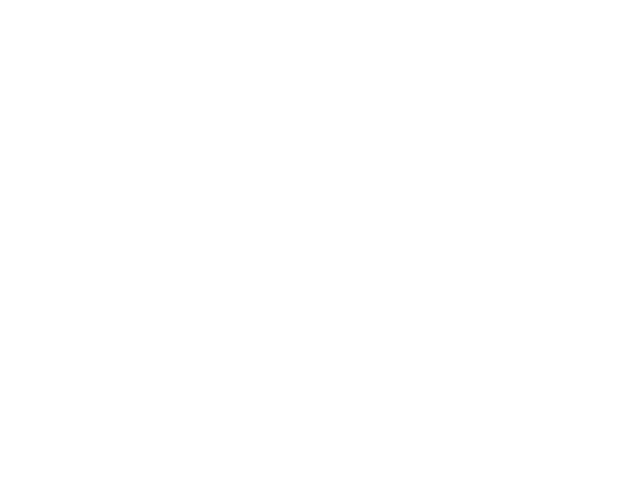

In [19]:
from ipywidgets import interact

# Use interactive to create the slider widget
a=interact(update_plot, year=(2020, 2050, 1))


In [20]:
vol=pd.DataFrame()
vol2=pd.DataFrame()
vol1=pd.DataFrame()
for category, sets in process.fleet_model.all_aircraft_elements.items():
    
    category_recent_reference = process.fleet_model.all_aircraft_elements[category][1]
    category_old_reference = process.fleet_model.all_aircraft_elements[category][0]
  
    for aircraft_var in sets:
                if hasattr(aircraft_var, "parameters"):
                    aircraft_var_name = aircraft_var.parameters.full_name
                    aircraft_ask = process.fleet_model.df.loc[:, aircraft_var_name+':aircraft_rpk']/process.vector_outputs_df.load_factor[2019]*100
                    aircraft_energy = (
                        1 + float(aircraft_var.parameters.consumption_evolution) / 100
                    ) * category_recent_reference.energy_per_ask
                    aircraft_abate=process.fleet_model.df.loc[:, aircraft_var_name+':aircraft_carbon_abatement_volume'] 
                    aircraft_share=process.fleet_model.df.loc[:, aircraft_var_name+':aircraft_share']
                    
                    
                else:
                    aircraft_var_name = aircraft_var.full_name
                    aircraft_energy = aircraft_var.energy_per_ask
                    aircraft_ask = process.fleet_model.df.loc[:, aircraft_var_name+':aircraft_rpk']/process.vector_outputs_df.load_factor[2019]*100
                    aircraft_abate=process.fleet_model.df.loc[:, aircraft_var_name+':aircraft_carbon_abatement_volume']
                    aircraft_share=process.fleet_model.df.loc[:, aircraft_var_name+':aircraft_share']
                    
                
                vol=pd.concat([vol,aircraft_energy*aircraft_ask], axis=1)
                vol1=pd.concat([vol1,aircraft_abate], axis=1)
                vol2=pd.concat([vol2,aircraft_share*aircraft_energy], axis=1)
                



In [21]:
vol2

,Short Range:SR conventional narrow-body:old_reference:aircraft_share,Short Range:SR conventional narrow-body:recent_reference:aircraft_share,Short Range:SR conventional narrow-body:New Short-range Aircraft:aircraft_share,Medium Range:MR conventional narrow-body:old_reference:aircraft_share,Medium Range:MR conventional narrow-body:recent_reference:aircraft_share,Medium Range:MR conventional narrow-body:New Medium-range Aircraft:aircraft_share,Long Range:LR conventional wide-body:old_reference:aircraft_share,Long Range:LR conventional wide-body:recent_reference:aircraft_share,Long Range:LR conventional wide-body:New Long-range Aircraft:aircraft_share,Long Range:LR conventional wide-body:New Long-range Aircraft 2:aircraft_share,Long Range:LR conventional wide-body:New Long-range Aircraft 3:aircraft_share
2000,124.725683,0.000000,0.000000,91.630601,0.000000,0.000000,108.797268,0.000000,0.000000,0.000000,0.000000
2001,124.725683,0.000000,0.000000,91.630601,0.000000,0.000000,108.797268,0.000000,0.000000,0.000000,0.000000
2002,124.725683,0.000000,0.000000,91.630601,0.000000,0.000000,108.797268,0.000000,0.000000,0.000000,0.000000
2003,124.725683,0.000000,0.000000,91.630601,0.000000,0.000000,108.797268,0.000000,0.000000,0.000000,0.000000
2004,124.725683,0.000000,0.000000,91.630601,0.000000,0.000000,108.797268,0.000000,0.000000,0.000000,0.000000
2005,124.725683,0.000000,0.000000,91.630601,0.000000,0.000000,108.797268,0.000000,0.000000,0.000000,0.000000
2006,124.725683,0.000000,0.000000,91.630601,0.000000,0.000000,108.797268,0.000000,0.000000,0.000000,0.000000
2007,124.725683,0.000000,0.000000,91.630601,0.000000,0.000000,108.797268,0.000000,0.000000,0.000000,0.000000
2008,121.475336,2.470029,0.000000,91.630601,0.000000,0.000000,108.797268,0.000000,0.000000,0.000000,0.000000
2009,120.329953,3.340437,0.000000,91.630601,0.000000,0.000000,108.797268,0.000000,0.000000,0.000000,0.000000


In [22]:
process.vector_outputs_df.energy_per_ask_without_operations_short_range_dropin_fuel[2019]

1.1531235517191722

In [23]:
vol1.sum(axis=1)/1e6

2000      0.000000
2001      0.000000
2002      0.000000
2003      0.000000
2004      0.000000
2005      0.000000
2006      0.000000
2007      0.000000
2008      0.000000
2009      0.000000
2010      0.000000
2011      0.000000
2012      0.000000
2013      0.000000
2014      0.000000
2015      0.000000
2016      0.000000
2017      0.000000
2018      0.000000
2019      0.000000
2020    -99.381440
2021     34.701711
2022     58.424728
2023     87.608595
2024    122.204498
2025    143.076740
2026    163.511147
2027    183.304612
2028    202.453707
2029    221.473655
2030    240.071392
2031    258.836073
2032    278.105146
2033    298.165038
2034    319.211245
2035    341.994290
2036    365.422079
2037    389.882819
2038    415.257054
2039    441.434602
2040    468.344882
2041    495.968134
2042    524.331128
2043    553.494668
2044    583.537448
2045    614.536771
2046    646.546939
2047    679.580804
2048    713.603487
2049    748.544107
2050    784.322290
1966      0.000000
1967      0.

In [24]:
((process.vector_outputs_df["co2_emissions_2019technology"]-process.vector_outputs_df[
"co2_emissions_including_aircraft_efficiency"
# "co2_emissions_including_operations"
# "co2_emissions_including_load_factor"
# "co2_emissions_including_energy"
]))

2000           NaN
2001           NaN
2002           NaN
2003           NaN
2004           NaN
2005           NaN
2006           NaN
2007           NaN
2008           NaN
2009           NaN
2010           NaN
2011           NaN
2012           NaN
2013           NaN
2014           NaN
2015           NaN
2016           NaN
2017           NaN
2018           NaN
2019      0.000000
2020    -99.381440
2021     34.701711
2022     58.424728
2023     87.608595
2024    122.204498
2025    143.076740
2026    163.511147
2027    183.304612
2028    202.453707
2029    221.473655
2030    240.071392
2031    258.836073
2032    278.105146
2033    298.165038
2034    319.211245
2035    341.994290
2036    365.422079
2037    389.882819
2038    415.257054
2039    441.434602
2040    468.344882
2041    495.968134
2042    524.331128
2043    553.494668
2044    583.537448
2045    614.536771
2046    646.546939
2047    679.580804
2048    713.603487
2049    748.544107
2050    784.322290
dtype: float64

In [25]:
# emissions référence ==> OK!!! 
process.vector_outputs_df["co2_emissions_2019technology"]*1e12-(
    process.vector_outputs_df.kerosene_emission_factor*process.vector_outputs_df.energy_per_ask_without_operations_short_range_dropin_fuel[2019]*process.vector_outputs_df.rpk_short_range/process.vector_outputs_df.load_factor[2019]*100)-(
    process.vector_outputs_df.kerosene_emission_factor*process.vector_outputs_df.energy_per_ask_without_operations_medium_range_dropin_fuel[2019]*process.vector_outputs_df.rpk_medium_range/process.vector_outputs_df.load_factor[2019]*100)-(
    process.vector_outputs_df.kerosene_emission_factor*process.vector_outputs_df.energy_per_ask_without_operations_long_range_dropin_fuel[2019]*process.vector_outputs_df.rpk_long_range/process.vector_outputs_df.load_factor[2019]*100)
    

2000        NaN
2001        NaN
2002        NaN
2003        NaN
2004        NaN
2005        NaN
2006        NaN
2007        NaN
2008        NaN
2009        NaN
2010        NaN
2011        NaN
2012        NaN
2013        NaN
2014        NaN
2015        NaN
2016        NaN
2017        NaN
2018        NaN
2019    0.31250
2020    0.03125
2021    0.00000
2022    0.15625
2023    0.18750
2024    0.31250
2025    0.25000
2026    0.06250
2027   -0.12500
2028    0.06250
2029    0.00000
2030    0.12500
2031    0.25000
2032    0.37500
2033    0.12500
2034    0.06250
2035   -0.12500
2036    0.00000
2037   -0.25000
2038    0.50000
2039   -0.12500
2040    0.25000
2041   -0.37500
2042    0.25000
2043    0.25000
2044    0.62500
2045    0.12500
2046    0.75000
2047   -0.12500
2048    0.75000
2049    0.37500
2050   -0.25000
dtype: float64

In [26]:
## MARCHE PAR CALCUL DETOURNé!


((process.vector_outputs_df["co2_emissions_2019technology"]-process.vector_outputs_df[
"co2_emissions_including_aircraft_efficiency"
# "co2_emissions_including_operations"
# "co2_emissions_including_load_factor"
# "co2_emissions_including_energy"
]))*1e12-((
    process.vector_outputs_df.kerosene_emission_factor*process.vector_outputs_df.energy_per_ask_without_operations_short_range_dropin_fuel[2019]*process.vector_outputs_df.rpk_short_range/process.vector_outputs_df.load_factor[2019]*100)+(
    process.vector_outputs_df.kerosene_emission_factor*process.vector_outputs_df.energy_per_ask_without_operations_medium_range_dropin_fuel[2019]*process.vector_outputs_df.rpk_medium_range/process.vector_outputs_df.load_factor[2019]*100)+(
    process.vector_outputs_df.kerosene_emission_factor*process.vector_outputs_df.energy_per_ask_without_operations_long_range_dropin_fuel[2019]*process.vector_outputs_df.rpk_long_range/process.vector_outputs_df.load_factor[2019]*100)-(vol.sum(axis=1)*process.vector_outputs_df.kerosene_emission_factor))

1966             NaN
1967             NaN
1968             NaN
1969             NaN
1970             NaN
2000             NaN
2001             NaN
2002             NaN
2003             NaN
2004             NaN
2005             NaN
2006             NaN
2007             NaN
2008             NaN
2009             NaN
2010             NaN
2011             NaN
2012             NaN
2013             NaN
2014             NaN
2015             NaN
2016             NaN
2017             NaN
2018             NaN
2019   -3.469820e+13
2020   -1.167822e+14
2021    4.296875e-02
2022    2.500000e-01
2023    1.406250e-01
2024    2.343750e-01
2025   -9.375000e-02
2026   -6.250000e-02
2027   -2.500000e-01
2028    9.375000e-02
2029   -2.187500e-01
2030    9.375000e-02
2031    1.562500e-01
2032    5.937500e-01
2033    6.250000e-02
2034   -2.500000e-01
2035    1.875000e-01
2036   -3.125000e-01
2037   -3.750000e-01
2038    5.625000e-01
2039   -1.250000e-01
2040    3.125000e-01
2041   -3.750000e-01
2042    6.250

In [27]:
# emissions totales => OK!!!
process.vector_outputs_df["co2_emissions_including_aircraft_efficiency"]*1e12-(vol.sum(axis=1)*process.vector_outputs_df.kerosene_emission_factor)

1966             NaN
1967             NaN
1968             NaN
1969             NaN
1970             NaN
2000             NaN
2001             NaN
2002             NaN
2003             NaN
2004             NaN
2005             NaN
2006             NaN
2007             NaN
2008             NaN
2009             NaN
2010             NaN
2011             NaN
2012             NaN
2013             NaN
2014             NaN
2015             NaN
2016             NaN
2017             NaN
2018             NaN
2019    3.469820e+13
2020    1.167822e+14
2021   -6.250000e-02
2022   -1.250000e-01
2023    1.250000e-01
2024    0.000000e+00
2025    3.750000e-01
2026    1.250000e-01
2027    1.250000e-01
2028    0.000000e+00
2029    1.250000e-01
2030    0.000000e+00
2031    0.000000e+00
2032   -1.250000e-01
2033    0.000000e+00
2034    1.250000e-01
2035   -2.500000e-01
2036    5.000000e-01
2037    0.000000e+00
2038    0.000000e+00
2039    0.000000e+00
2040    0.000000e+00
2041    0.000000e+00
2042    0.000

In [28]:
diff=(vol.sum(axis=1) / (process.vector_outputs_df.rpk/(process.vector_outputs_df.load_factor[2019]/100)))-process.vector_outputs_df.energy_per_ask_mean_without_operations

In [29]:
diff

1966             NaN
1967             NaN
1968             NaN
1969             NaN
1970             NaN
2000   -1.651277e+00
2001   -1.620164e+00
2002   -1.644588e+00
2003   -1.580529e+00
2004   -1.503100e+00
2005   -1.469270e+00
2006   -1.413829e+00
2007   -1.359056e+00
2008   -1.301729e+00
2009   -1.253006e+00
2010   -1.246321e+00
2011   -1.199496e+00
2012   -1.164463e+00
2013   -1.142345e+00
2014   -1.113397e+00
2015   -1.099149e+00
2016   -1.076889e+00
2017   -1.077995e+00
2018   -1.054791e+00
2019   -3.711109e-02
2020   -3.673621e-01
2021    2.220446e-16
2022    2.220446e-16
2023   -1.110223e-16
2024    0.000000e+00
2025   -4.440892e-16
2026    0.000000e+00
2027   -2.220446e-16
2028    1.110223e-16
2029    0.000000e+00
2030    0.000000e+00
2031    0.000000e+00
2032    0.000000e+00
2033    1.110223e-16
2034   -1.110223e-16
2035    2.220446e-16
2036   -2.220446e-16
2037    0.000000e+00
2038   -1.110223e-16
2039   -1.110223e-16
2040    1.110223e-16
2041    1.110223e-16
2042    0.000

In [30]:
diff*process.vector_outputs_df.rpk/(process.vector_outputs_df.load_factor[2019]/100)*process.vector_outputs_df.kerosene_emission_factor

1966             NaN
1967             NaN
1968             NaN
1969             NaN
1970             NaN
2000   -5.399337e+14
2001   -5.144165e+14
2002   -5.356278e+14
2003   -5.326140e+14
2004   -5.839015e+14
2005   -6.189842e+14
2006   -6.338566e+14
2007   -6.602555e+14
2008   -6.457688e+14
2009   -6.152513e+14
2010   -6.614526e+14
2011   -6.784767e+14
2012   -6.938946e+14
2013   -7.181045e+14
2014   -7.417407e+14
2015   -7.871553e+14
2016   -8.282139e+14
2017   -8.954460e+14
2018   -9.400111e+14
2019   -3.469820e+13
2020   -1.167822e+14
2021    1.048419e-01
2022    1.390972e-01
2023   -8.667621e-02
2024    0.000000e+00
2025   -4.318240e-01
2026    0.000000e+00
2027   -2.335304e-01
2028    1.214358e-01
2029    0.000000e+00
2030    0.000000e+00
2031    0.000000e+00
2032    0.000000e+00
2033    1.477452e-01
2034   -1.536550e-01
2035    3.196025e-01
2036   -3.323866e-01
2037    0.000000e+00
2038   -1.797547e-01
2039   -1.869449e-01
2040    1.944227e-01
2041    2.021996e-01
2042    0.000

In [31]:
process.fleet_model.df

,Short Range:SR conventional narrow-body:recent_reference:single_aircraft_share,Short Range:SR conventional narrow-body:old_reference:single_aircraft_share,Short Range:SR conventional narrow-body:New Short-range Aircraft:single_aircraft_share,Medium Range:MR conventional narrow-body:recent_reference:single_aircraft_share,Medium Range:MR conventional narrow-body:old_reference:single_aircraft_share,Medium Range:MR conventional narrow-body:New Medium-range Aircraft:single_aircraft_share,Long Range:LR conventional wide-body:recent_reference:single_aircraft_share,Long Range:LR conventional wide-body:old_reference:single_aircraft_share,Long Range:LR conventional wide-body:New Long-range Aircraft:single_aircraft_share,Long Range:LR conventional wide-body:New Long-range Aircraft 2:single_aircraft_share,Long Range:LR conventional wide-body:New Long-range Aircraft 3:single_aircraft_share,Short Range:SR conventional narrow-body:New Short-range Aircraft:aircraft_share,Short Range:SR conventional narrow-body:recent_reference:aircraft_share,Short Range:SR conventional narrow-body:old_reference:aircraft_share,Medium Range:MR conventional narrow-body:New Medium-range Aircraft:aircraft_share,Medium Range:MR conventional narrow-body:recent_reference:aircraft_share,Medium Range:MR conventional narrow-body:old_reference:aircraft_share,Long Range:LR conventional wide-body:New Long-range Aircraft 3:aircraft_share,Long Range:LR conventional wide-body:New Long-range Aircraft 2:aircraft_share,Long Range:LR conventional wide-body:New Long-range Aircraft:aircraft_share,Long Range:LR conventional wide-body:recent_reference:aircraft_share,Long Range:LR conventional wide-body:old_reference:aircraft_share,Short Range:SR conventional narrow-body:energy_consumption,Short Range:SR conventional narrow-body:energy_consumption:dropin_fuel,Short Range:SR conventional narrow-body:energy_consumption:hydrogen,Short Range:SR conventional narrow-body:share:total,Short Range:SR conventional narrow-body:share:dropin_fuel,Short Range:SR conventional narrow-body:share:hydrogen,Short Range:share:dropin_fuel,Short Range:share:hydrogen,Medium Range:MR conventional narrow-body:energy_consumption,Medium Range:MR conventional narrow-body:energy_consumption:dropin_fuel,Medium Range:MR conventional narrow-body:energy_consumption:hydrogen,Medium Range:MR conventional narrow-body:share:total,Medium Range:MR conventional narrow-body:share:dropin_fuel,Medium Range:MR conventional narrow-body:share:hydrogen,Medium Range:share:dropin_fuel,Medium Range:share:hydrogen,Long Range:LR conventional wide-body:energy_consumption,Long Range:LR conventional wide-body:energy_consumption:dropin_fuel,Long Range:LR conventional wide-body:energy_consumption:hydrogen,Long Range:LR conventional wide-body:share:total,Long Range:LR conventional wide-body:share:dropin_fuel,Long Range:LR conventional wide-body:share:hydrogen,Long Range:share:dropin_fuel,Long Range:share:hydrogen,Short Range:SR conventional narrow-body:doc_non_energy,Short Range:SR conventional narrow-body:doc_non_energy:dropin_fuel,Short Range:SR conventional narrow-body:doc_non_energy:hydrogen,Medium Range:MR conventional narrow-body:doc_non_energy,Medium Range:MR conventional narrow-body:doc_non_energy:dropin_fuel,Medium Range:MR conventional narrow-body:doc_non_energy:hydrogen,Long Range:LR conventional wide-body:doc_non_energy,Long Range:LR conventional wide-body:doc_non_energy:dropin_fuel,Long Range:LR conventional wide-body:doc_non_energy:hydrogen,Short Range:SR conventional narrow-body:emission_index_nox,Short Range:SR conventional narrow-body:emission_index_soot,Short Range:SR conventional narrow-body:emission_index_nox:dropin_fuel,Short Range:SR conventional narrow-body:emission_index_nox:hydrogen,Short Range:SR conventional narrow-body:emission_index_soot:dropin_fuel,Short Range:SR conventional narrow-body:emission_index_soot:hydrogen,Medium Range:MR conventional narrow-body:emission_index_nox,Medium Range:MR conventional narrow-b

In [32]:
process.vector_outputs_df.energy_per_ask_mean.loc[2020 - 1]/process.vector_outputs_df.energy_per_ask_mean_without_operations.loc[2020 - 1]

1.0

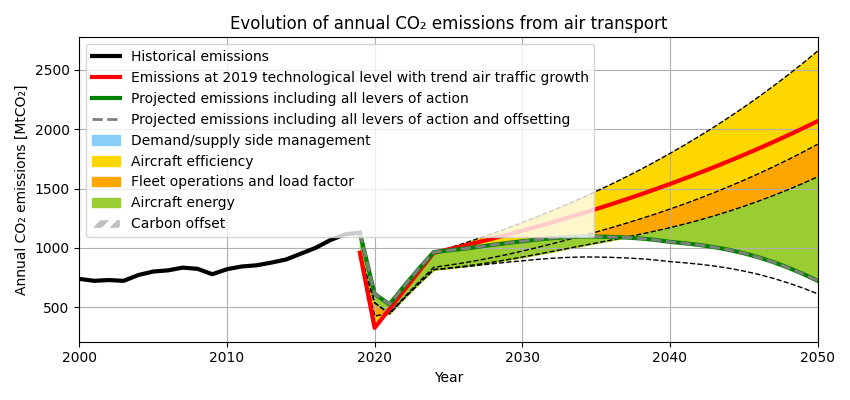

In [33]:
process.plot("air_transport_co2_emissions", save=False)